## <u>Python for AI-ML</u>

# Self Paced Module - Web Scraping

# Use Case-2: Adfy Classifieds

### Problem Statement

Adfy Classifieds helps businesses grow with their strong advertisement systems and tools. They have been working endlessly to increase they customer experience who wants to grow their business. They used to manually review the websites to advertise on. Since, their business is growing at a rapid rate it is quite difficult to manually review the websites. Instead, they want to switch over to better ranking systems like Quantcast and Alexa ranks, simultaneously automating this process.

### Solution:
Scraping the website ebizmba.com to fetch the relevant results using:

- Scrapy
- Crochet (Library to run scrapy on notebook)

### Tasks to be Performed:
1. Importing Libraries
2. Setting up crochet
3. Inspecting the webpage
4. Creating Item
5. Creating the Spider
6. Creating the pipeline
7. Crawling with spider 
8. Preprocess the data
9. Find top 5 most visited websites and least visited websites
10. Find best 5 websites to place ad on based on Quantcast Rank
11. Find 5 best websites and worst to place ad on based on eBizMBA Rank for each topic

<h3>1. Importing Libraries

In [8]:
!pip install scrapy -q
!pip install crochet -q

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [9]:
import scrapy
from scrapy.crawler import CrawlerRunner
from scrapy.loader import ItemLoader
from scrapy.exporters import CsvItemExporter

<h3>2. Setting up crochet

<h5>To run spiders smoothly scrapy uses twisted library internally. But the problem is the twisted reactor can only be instantiated once. Therefore, crochet is used so that we can test our spider easily.

In [2]:
import crochet
crochet.setup()

<h3>3. Inspecting the webpage

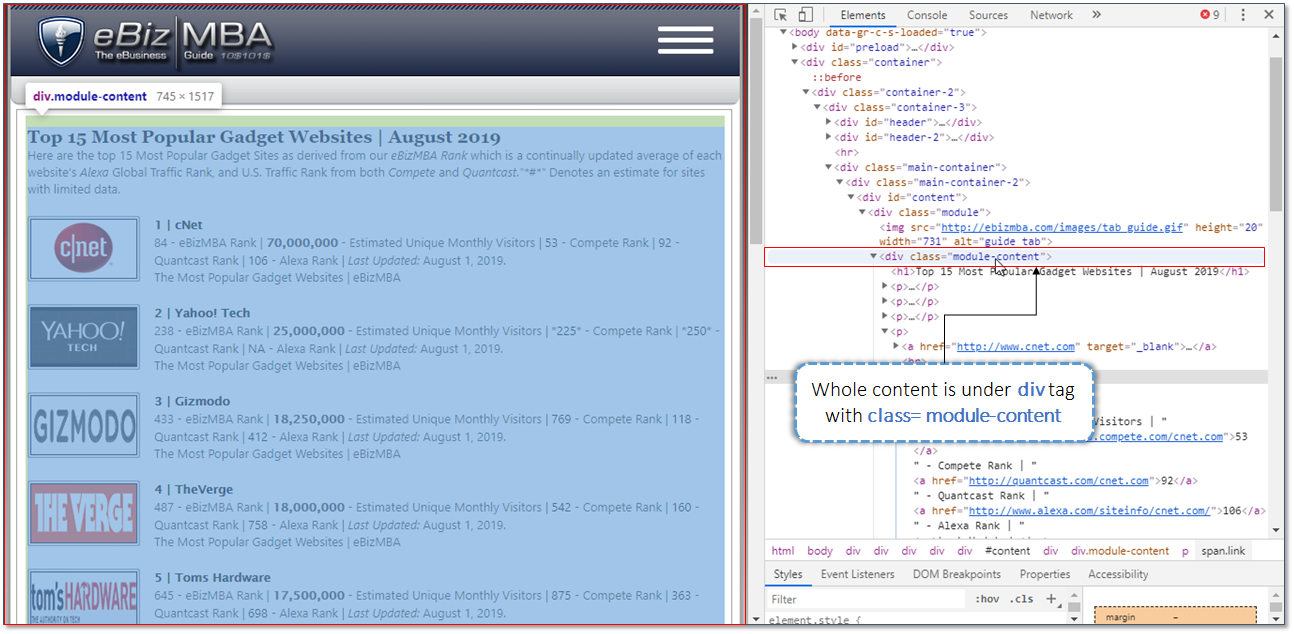

<hr>

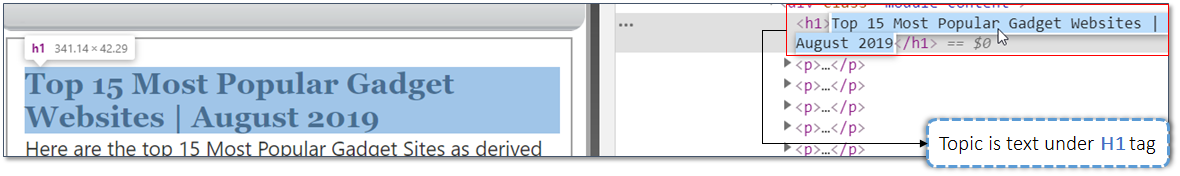

<hr>

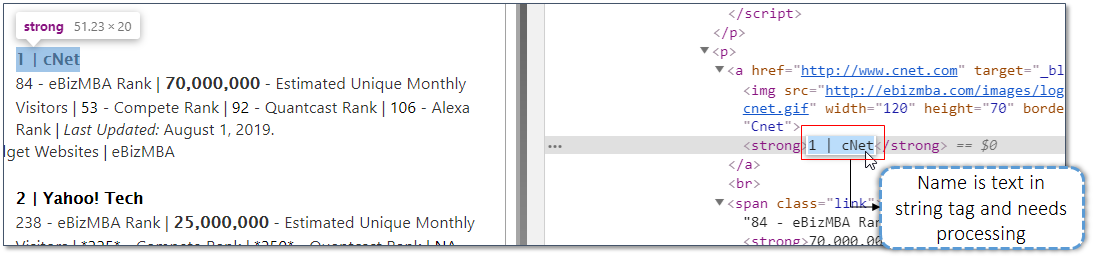

<hr>

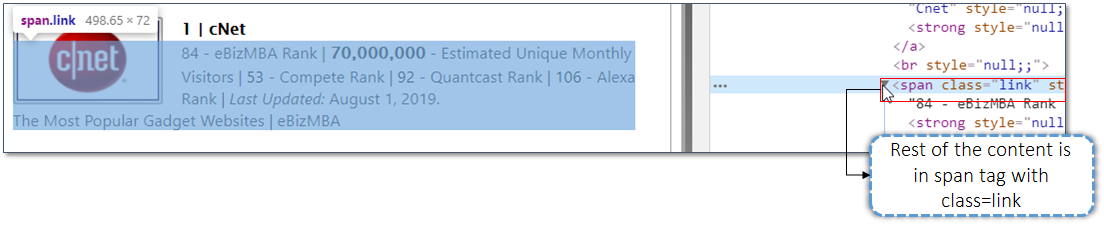

<hr>

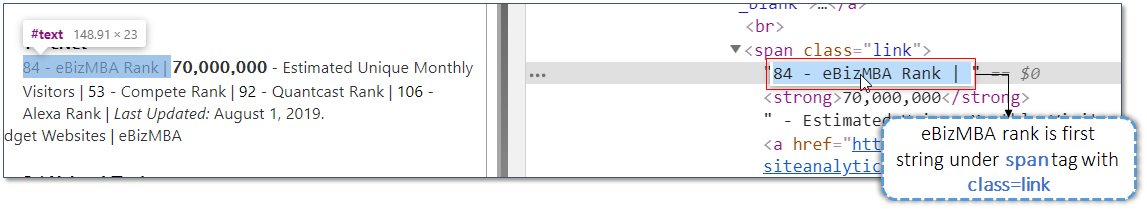

<hr>

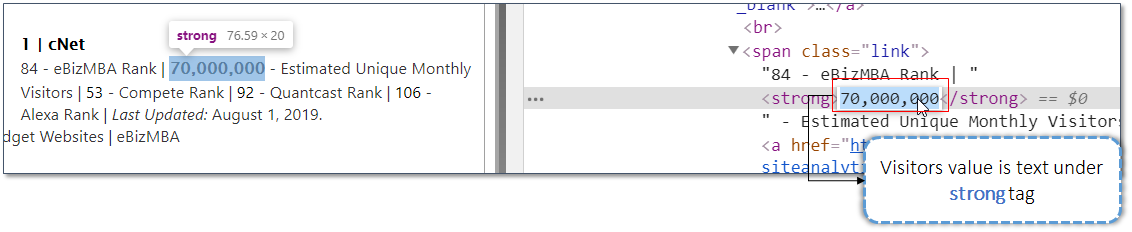

<hr>

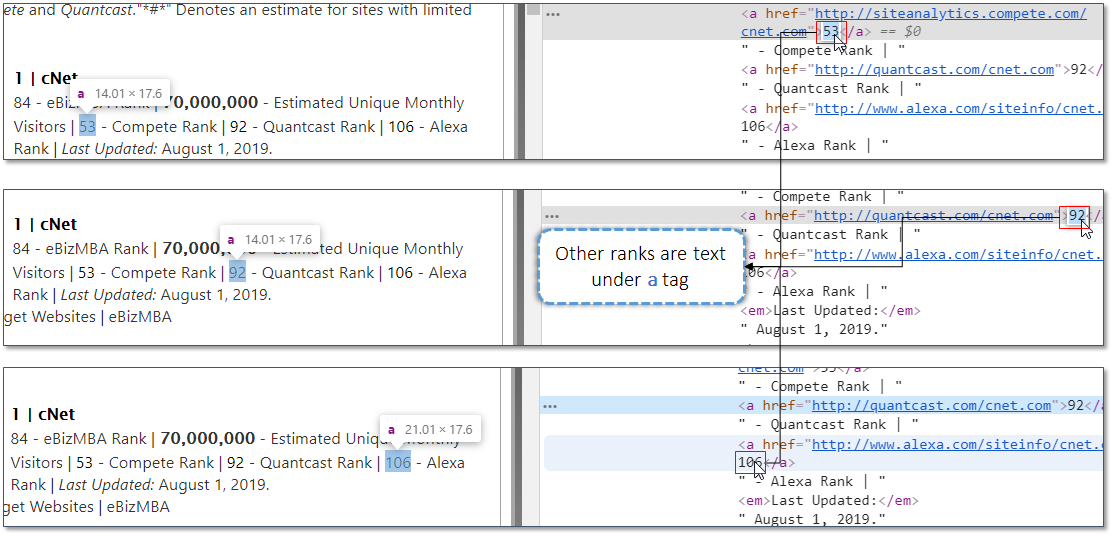

<hr>

<h3>4. Creating Item 
<h6>We have to create a Item class to process and store the data. The values we are using are:</h6>
    <p>
        <ul>
         <li> <b>Topic</b> - Topic of the website
         <li> <b>Name</b> - Name of the website
         <li> <b>eBizMBA_rank</b> - eBizMBA rank
         <li> <b>Monthly_visitors</b> - Total Monthly visitors
         <li> <b>Complete_rank</b> - Complete rank
         <li> <b>Quantcast_rank</b> - Quantcast rank
         <li> <b>Alexa_rank</b> - Alexa rank

In [140]:
class Website(scrapy.Item):
    Topic=scrapy.Field()
    Name=scrapy.Field()
    eBizMBA_rank=scrapy.Field()
    Monthly_visitors=scrapy.Field()
    Complete_rank=scrapy.Field()
    Quantcast_rank=scrapy.Field()
    Alexa_rank=scrapy.Field()

<h3>5. Creating the Spider

In [141]:
class RankSpider(scrapy.Spider):
    name='RankSpider'
#     start_urls=['']
    
    start_urls=['http://www.ebizmba.com/articles/news-websites',
               'http://www.ebizmba.com/articles/gadget-websites',
               'http://www.ebizmba.com/articles/coupon-websites',
               'http://www.ebizmba.com/articles/game-websites',
               'http://www.ebizmba.com/articles/business-websites',
               'http://www.ebizmba.com/articles/dating-websites',
               'http://www.ebizmba.com/articles/travel-websites']
    def parse(self,response):
        print(response.status)
        topic=response.url
        titles=response.xpath('//*[@class="module-content"]/p/a/strong/text()').extract()
        content=response.xpath('//*[@class="module-content"]/p/span[@class="link"]')
    
        
        for i in range(len(titles)):
            loader=ItemLoader(item=Website(),response=response)
            eBizMBA_rank=content[i].xpath('text()').extract_first()
            
            Monthly_visitors = content[i].xpath('strong/text()').extract_first()
            
            other_ranks=content[i].xpath('a/text()').extract()
            
            loader.add_value('Topic',topic)
            loader.add_value('Name',titles[i])
            loader.add_value('eBizMBA_rank',eBizMBA_rank)
            loader.add_value('Monthly_visitors',Monthly_visitors)
            loader.add_value('Complete_rank',other_ranks[0])
            loader.add_value('Quantcast_rank',other_ranks[1])
            loader.add_value('Alexa_rank',other_ranks[2])
            yield loader.load_item()

<h3>6. Creating the pipeline

In [147]:
from scrapy.exporters import CsvItemExporter
class RankPipeline(object):
    
    def open_spider(self, spider):
        print('started exporting')
        output_file=open('Ranking.csv','wb')
        self.file=output_file
        self.exporter=CsvItemExporter(output_file,include_headers_line=True)
        self.exporter.start_exporting()
        
    def close_spider(self,spider):
        print('stopped exporting')
        self.exporter.finish_exporting()
        self.file.close()
        
    def process_item(self,item,spider):
        
        process_Topic=item['Topic'][0]
        process_Topic=process_Topic.split('/')[-1].split('-')[0].capitalize()
        item['Topic']=process_Topic
        
        process_Name=item['Name'][0]
        sep_index=process_Name.index('|')
        item['Name']=process_Name[sep_index+1:].lstrip()

        process_eBizMBA_rank=item['eBizMBA_rank'][0]
        dash_index=process_eBizMBA_rank.index('-')
        item['eBizMBA_rank']=process_eBizMBA_rank[:dash_index]
        self.exporter.export_item(item)
        return item
        

<h3>7. Crawling with spider
<h4>we use CrawlRunner to run the spider

In [148]:
# wait until all the data is exported
process = CrawlerRunner({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
    'ITEM_PIPELINES':{'__main__.RankPipeline':1},
    'DOWNLOAD_DELAY':1
})
process.crawl(RankSpider)

started exporting


200
200
200
200
200
200
200
stopped exporting


#### 8. Preprocess the Data

In [128]:
import pandas as pd
import numpy as np

In [149]:
data=pd.read_csv('Ranking.csv')

In [150]:
data.head()

Alexa_rank Complete_rank Monthly_visitors            Name Quantcast_rank  \
0        NaN          *29*      175,000,000     Yahoo! News           *30*   
1        NaN          *45*      150,000,000     Google News           *25*   
2         78            21      110,000,000  HuffingtonPost           *14*   
3         57            41       95,000,000             CNN             90   
4        125            85       70,000,000  New York Times             54   

  Topic eBizMBA_rank  
0  News          30   
1  News          35   
2  News          38   
3  News          63   
4  News          88

In [151]:
data.shape

(105, 7)

In [152]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Alexa_rank        96 non-null     object
 1   Complete_rank     105 non-null    object
 2   Monthly_visitors  105 non-null    object
 3   Name              105 non-null    object
 4   Quantcast_rank    101 non-null    object
 5   Topic             105 non-null    object
 6   eBizMBA_rank      105 non-null    object
dtypes: object(7)
memory usage: 5.9+ KB


In [153]:
# Checking how many columns has empty values
data.isna().any()

Alexa_rank           True
Complete_rank       False
Monthly_visitors    False
Name                False
Quantcast_rank       True
Topic               False
eBizMBA_rank        False
dtype: bool

##### Cleaning and manipulating the data 

In [154]:
data.Quantcast_rank=data.Quantcast_rank.fillna('-1')
data.Alexa_rank=data.Alexa_rank.fillna('-1')

In [155]:
data.eBizMBA_rank=data.eBizMBA_rank.str.replace(',','')
data.Alexa_rank=data.Alexa_rank.str.replace(',','')

In [156]:
data.eBizMBA_rank=data.eBizMBA_rank.astype(int)

In [157]:
data.Alexa_rank=data.Alexa_rank.astype(np.float)

In [158]:
# Cleaing Quantcast_rank and Complete Rank 
data.Quantcast_rank=data.Quantcast_rank.str.replace('*','')
data.Complete_rank=data.Complete_rank.str.replace('*','')
data.Complete_rank=data.Complete_rank.str.replace(',','')
data.Quantcast_rank=data.Quantcast_rank.str.replace(',','')
data.Quantcast_rank=data.Quantcast_rank.str.replace('NA','-1')

In [159]:
data.Quantcast_rank=data.Quantcast_rank.astype(np.float)
data.Complete_rank=data.Complete_rank.astype(np.float)

In [160]:
# Cleaning monthly visitors
data.Monthly_visitors=data.Monthly_visitors.str.replace(',','')
data.Monthly_visitors=data.Monthly_visitors.astype(np.float)

In [161]:
# Changing data type for string features
data.Topic=data.Topic.astype('category')
data.Name=data.Name.astype(np.str)

In [162]:
data.isna().any()

Alexa_rank          False
Complete_rank       False
Monthly_visitors    False
Name                False
Quantcast_rank      False
Topic               False
eBizMBA_rank        False
dtype: bool

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Alexa_rank        105 non-null    float64 
 1   Complete_rank     105 non-null    float64 
 2   Monthly_visitors  105 non-null    float64 
 3   Name              105 non-null    object  
 4   Quantcast_rank    105 non-null    float64 
 5   Topic             105 non-null    category
 6   eBizMBA_rank      105 non-null    int64   
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 5.5+ KB


In [164]:
data.head()

Alexa_rank  Complete_rank  Monthly_visitors            Name  \
0        -1.0           29.0       175000000.0     Yahoo! News   
1        -1.0           45.0       150000000.0     Google News   
2        78.0           21.0       110000000.0  HuffingtonPost   
3        57.0           41.0        95000000.0             CNN   
4       125.0           85.0        70000000.0  New York Times   

   Quantcast_rank Topic  eBizMBA_rank  
0            30.0  News            30  
1            25.0  News            35  
2            14.0  News            38  
3            90.0  News            63  
4            54.0  News            88

#### 9. Find top 5 most visited websites and least visited websites

In [165]:
data.sort_values(by='Monthly_visitors',ascending=False).head()

Alexa_rank  Complete_rank  Monthly_visitors            Name  \
0         -1.0           29.0       175000000.0     Yahoo! News   
1         -1.0           45.0       150000000.0     Google News   
2         78.0           21.0       110000000.0  HuffingtonPost   
3         57.0           41.0        95000000.0             CNN   
60        -1.0           50.0        75000000.0  Yahoo! Finance   

    Quantcast_rank     Topic  eBizMBA_rank  
0             30.0      News            30  
1             25.0      News            35  
2             14.0      News            38  
3             90.0      News            63  
60           170.0  Business           110

In [166]:
data.sort_values(by='Monthly_visitors',ascending=False).tail()

Alexa_rank  Complete_rank  Monthly_visitors              Name  \
85     12071.0         4861.0         1000000.0        HowAboutWe   
86     14723.0         1732.0          900000.0  SeniorPeopleMeet   
87     24840.0          800.0          850000.0         SpeedDate   
88     16408.0         3061.0          550000.0         Chemistry   
89     10210.0         8060.0          500000.0             JDate   

    Quantcast_rank   Topic  eBizMBA_rank  
85          1292.0  Dating          6075  
86          3965.0  Dating          6807  
87          1200.0  Dating          8947  
88            -1.0  Dating          9735  
89         11952.0  Dating         10074

#### 10. Find best 5 websites to place ad on based on Quantcast Rank


In [169]:
data.sort_values(by='Quantcast_rank',ascending=True).head()

Alexa_rank  Complete_rank  Monthly_visitors        Name  Quantcast_rank  \
35       673.0          889.0        17000000.0  SlickDeals            -1.0   
56     13729.0         2497.0         2500000.0   Shockwave            -1.0   
48      1196.0          762.0        14500000.0    MiniClip            -1.0   
43      6231.0         1897.0         4500000.0     Savings            -1.0   
82      6876.0          444.0         3500000.0     OurTime            -1.0   

     Topic  eBizMBA_rank  
35  Coupon           781  
56    Game          8113  
48    Game           979  
43  Coupon          4064  
82  Dating          2986

##### This does not work

In [170]:
qrank=data[data.Quantcast_rank>=0]

In [172]:
qrank.sort_values(by='Quantcast_rank').head()

Alexa_rank  Complete_rank  Monthly_visitors            Name  \
2         78.0           21.0       110000000.0  HuffingtonPost   
6        307.0           45.0        63000000.0        NBC News   
1         -1.0           45.0       150000000.0     Google News   
0         -1.0           29.0       175000000.0     Yahoo! News   
63        -1.0          250.0        58000000.0       CNN Money   

    Quantcast_rank     Topic  eBizMBA_rank  
2             14.0      News            38  
6             23.0      News           125  
1             25.0      News            35  
0             30.0      News            30  
63            45.0  Business           148

#### 11. Find 5 best websites and worst to place ad on based on eBizMBA Rank for each topic

In [174]:
print(*data.columns)

Alexa_rank Complete_rank Monthly_visitors Name Quantcast_rank Topic eBizMBA_rank


In [176]:
# Group the data by Country and find highest place count
epty=pd.DataFrame({'Alexa_rank':[], 'Complete_rank':[], 'Monthly_visitors':[], 'Name':[],
 'Quantcast_rank':[], 'Topic':[], 'eBizMBA_rank':[],})
epwy=pd.DataFrame({'Alexa_rank':[], 'Complete_rank':[], 'Monthly_visitors':[], 'Name':[],
 'Quantcast_rank':[], 'Topic':[], 'eBizMBA_rank':[],})
for grp, gata in data.groupby('Topic'):
    out=gata.sort_values(by='eBizMBA_rank').head()
    put=gata.sort_values(by='eBizMBA_rank').tail()
    epty=epty.append(out)
    epwy=epwy.append(put)

#### 5 Best website to put ad on based on eBizMBA rank for each topic

In [177]:
pd.DataFrame(epty)

Alexa_rank  Complete_rank  Monthly_visitors              Name  \
60        -1.0           50.0        75000000.0    Yahoo! Finance   
61       159.0           83.0        65000000.0            Forbes   
62        -1.0          100.0        60000000.0  MSN MoneyCentral   
63        -1.0          250.0        58000000.0         CNN Money   
64       219.0          221.0        42000000.0               WSJ   
30       393.0           98.0        30000000.0           GroupOn   
31       418.0          239.0        24000000.0       RetailMeNot   
32       904.0          123.0        20000000.0            Zulily   
33       678.0          160.0        18250000.0           Coupons   
34      1421.0          104.0        18000000.0        ShopAtHome   
75       500.0          112.0        35000000.0             Match   
76       394.0          369.0        23000000.0      PlentyOfFish   
77      1226.0          131.0        11500000.0             Zoosk   
78       417.0         1441.0        10150000.0           OkCupid   
79      3189.0          350.0         7100000.0          eHarmony   
15       106.0           53.0        70000000.0              cNet   
16        -1.0          225.0        25000000.0       Yahoo! Tech   
17       412.0          769.0        18250000.0           Gizmodo   
18       758.0          542.0        18000000.0          TheVerge   
19       698.0          875.0        17500000.0     Toms Hardware   
45        -1.0           98.0        25000000.0      Yahoo! Games   
46       351.0          738.0        19000000.0                Y8   
47      1873.0           69.0        18000000.0              Pogo   
48      1196.0          762.0        14500000.0          MiniClip   
49      2505.0          543.0         9000000.0      BigFishGames   
0         -1.0           29.0       175000000.0       Yahoo! News   
1         -1.0           45.0       150000000.0       Google News   
2         78.0           21.0       110000000.0    HuffingtonPost   
3         57.0           41.0        95000000.0               CNN   
4        125.0           85.0        70000000.0    New York Times   
90       125.0          100.0        40000000.0           Booking   
91       209.0           68.0        38000000.0       TripAdvisor   
92        -1.0          165.0        36000000.0     Yahoo! Travel   
93       515.0           77.0        25000000.0           Expedia   
94       670.0          130.0        20000000.0         Priceline   

    Quantcast_rank     Topic  eBizMBA_rank  
60           170.0  Business         110.0  
61           165.0  Business         136.0  
62           175.0  Business         138.0  
63            45.0  Business         148.0  
64           172.0  Business         204.0  
30           292.0    Coupon         261.0  
31           301.0    Coupon         319.0  
32           641.0    Coupon         556.0  
33          1280.0    Coupon         706.0  
34            -1.0    Coupon         763.0  
75            50.0    Dating         221.0  
76           610.0    Dating         458.0  
77           818.0    Dating         725.0  
78           401.0    Dating         753.0  
79           295.0    Dating        1278.0  
15            92.0    Gadget          84.0  
16           250.0    Gadget         238.0  
17           118.0    Gadget         433.0  
18           160.0    Gadget         487.0  
19           363.0    Gadget         645.0  
45           460.0      Game         279.0  
46           589.0      Game         559.0  
47           173.0      Game         705.0  
48            -1.0      Game         979.0  
49           392.0      Game        1147.0  
0             30.0      News          30.0  
1             25.0      News          35.0  
2             14.0      News          38.0  
3             90.0      News          63.0  
4             54.0      News          88.0  
90           111.0    Travel         112.0  
91           126.0    Travel         134.0  
92           176.0    Travel      

##### 5 Worst website to put ad on based on eBizMBA rank for each topic

In [178]:
pd.DataFrame(epwy)

Alexa_rank  Complete_rank  Monthly_visitors              Name  \
70        560.0          437.0        19000000.0       MarketWatch   
71        856.0          485.0        18000000.0      BusinessWeek   
72       1076.0          186.0        17000000.0                FT   
73       1187.0          652.0        16000000.0       IBTimes.com   
74        897.0          830.0        15500000.0      SeekingAlpha   
40       2847.0         1671.0         5900000.0              Gilt   
41       4527.0         1678.0         5500000.0         DealsPlus   
42       5522.0         1815.0         5000000.0        BradsDeals   
43       6231.0         1897.0         4500000.0           Savings   
44       7327.0         2508.0         3500000.0       DealCatcher   
85      12071.0         4861.0         1000000.0        HowAboutWe   
86      14723.0         1732.0          900000.0  SeniorPeopleMeet   
87      24840.0          800.0          850000.0         SpeedDate   
88      16408.0         3061.0          550000.0         Chemistry   
89      10210.0         8060.0          500000.0             JDate   
25       3434.0         4055.0         4200000.0            GizMag   
26       3115.0         4495.0         3200000.0         AnAndTech   
27       4699.0         4410.0         3000000.0             iMore   
28        334.0         7409.0         2500000.0          GSMArena   
29       6602.0         6944.0         2000000.0              Geek   
55      15126.0         1690.0         2900000.0         GameHouse   
56      13729.0         2497.0         2500000.0         Shockwave   
57      21455.0         1734.0         2000000.0             Iplay   
58      24636.0         5784.0         1750000.0             Bored   
59      40657.0          565.0         1500000.0     FreeRideGames   
10        221.0          204.0        40000000.0               WSJ   
11        404.0          110.0        36000000.0           ABCNews   
12         64.0          300.0        35000000.0          BBC News   
13        287.0           96.0        34000000.0         USA Today   
14        452.0          172.0        32500000.0          LA Times   
100      1926.0          566.0         8250000.0          HomeAway   
101      3255.0          695.0         7000000.0         TravelZoo   
102      1057.0         1142.0         6000000.0            AirBnB   
103      1702.0         2626.0         4000000.0      LonelyPlanet   
104      4147.0         1676.0         3000000.0            Viator   

     Quantcast_rank     Topic  eBizMBA_rank  
70            288.0  Business         428.0  
71            450.0  Business         597.0  
72            632.0  Business         631.0  
73            112.0  Business         650.0  
74           1035.0  Business         921.0  
40           2034.0    Coupon        2184.0  
41           2549.0    Coupon        2918.0  
42           1884.0    Coupon        3074.0  
43             -1.0    Coupon        4064.0  
44           2884.0    Coupon        4240.0  
85           1292.0    Dating        6075.0  
86           3965.0    Dating        6807.0  
87           1200.0    Dating        8947.0  
88             -1.0    Dating        9735.0  
89          11952.0    Dating       10074.0  
25           1001.0    Gadget        2830.0  
26           1883.0    Gadget        3164.0  
27            446.0    Gadget        3185.0  
28           3943.0    Gadget        3895.0  
29           2843.0    Gadget        5463.0  
55            746.0      Game        5854.0  
56             -1.0      Game        8113.0  
57           1381.0      Game        8190.0  
58           4047.0      Game       11489.0  
59            593.0      Game       13938.0  
10            161.0      News         195.0  
11            150.0      News         221.0  
12            350.0      News         238.0  
13            359.0      News         247.0  
14            380.0      News         335.0  
100           871.0    Travel        1121.0  
101         